# BaggingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

## set up

### local computer

In [ ]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
from brainstation_capstone.ml.toolbox.mlSOP import test_model
from brainstation_capstone.ml.toolbox.mlSOP import ml_timer
# import standard libraries
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt# import local libraries using host specific paths
# report latest run
print(f'last ran on: {datetime.datetime.now()} PT')
# import data
from brainstation_capstone.etl.loaddata import nutcracker
data = nutcracker(localpaths, 'nutcracker', ['X_train','X_test','y_train','y_test'])

getting host computer specific paths
loading 4 files
loading file: 0loading file: 1loading file: 2loading file: 3loading completed


### google colab

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
# import functions
import pandas as pd
import numpy as np
import os, time, datetime
class test_model:
    def __init__(self):
        # set test and train score
        self.test_acc = []
        self.train_acc = []
    def score_data(self, model, datadict):
        self.model = model
        self.data = datadict
        # fit model
        self.model.fit(self.data['X_train'], self.data['y_train'])
        # train score
        train_score = self.model.score(self.data['X_train'], self.data['y_train'])
        print(f"\tTrain Score: {train_score}")
        self.train_acc.append(train_score)
        # test score
        test_score = self.model.score(self.data['X_test'], self.data['y_test'])
        print(f"\tTest Score: {test_score}")
        self.test_acc.append(test_score)

class ml_timer:
    def __init__(self):
        # initate session start time
        self.start = time.time()
        # initiate holder for times
        self.session_times = []
        print('timer starts')

    def param_start(self):
        # update current session start time
        self.current_session_start = time.time()

    def param_end(self):
        end_time = time.time()
        elapsed_time = end_time - self.current_session_start
        print(f'\telapsed time {elapsed_time/60:.3f} min')
        self.session_times.append(elapsed_time)
    
    def session_end(self):
        self.end = time.time()
    
    def get_time(self):
        print(f'total time: {(self.end - self.start)/60:.3f} min')
        return self.session_times

def hyperparameterplot(hyperparameter_list, train_score_list, test_score_list, \
                        hyperparameter_name='', titlename=''):
    
    # check if hyperparameter list is string or number
    if isinstance(hyperparameter_list[0], str):
        hyperparameter_label = hyperparameter_list.copy()
        hyperparameter_list = range(len(hyperparameter_list))
    # graph
    plt.figure()
    plt.plot(hyperparameter_list, train_score_list, color='blue', label='train')
    plt.plot(hyperparameter_list, test_score_list, color='red', label='test')
    plt.title(titlename)
    plt.xlabel(hyperparameter_name)
    if isinstance(hyperparameter_list[0], str):
        plt.xticks(labels=hyperparameter_label)
    plt.ylabel('accuracy score')
    plt.legend()
    plt.show()

In [ ]:
# define file directory
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
# get files from google drive
print('loading data to data dictionary')
datatype = ['X_train','X_test','y_train','y_test']
dataname = 'nutcracker'
data = dict()
for i, dname in enumerate(datatype):
    print(f'loading file: {i}', end='\r')
    filename = dataname + '_' + dname + '.csv'
    filepath = os.path.join(file_dir, filename)
    data[dname] = np.loadtxt(filepath, delimiter=',')
print('loading completed')
# print the array shape to confirm successful loading
print(X_train.shape)



---

## google drive testing

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
# define file directory
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
# get files from google drive
X_train = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')
X_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_test.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_test.csv'), delimiter=',')
# print the array shape to confirm successful loading
print(X.shape)

(1600000, 21)


In [ ]:
# untuned
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=318)
model.fit(X,y)
print(f'train score: {model.score(X, y)}')
print(f'test score: {model.score(X_test, y_test)}')

train score: 0.991789375
test score: 0.8857725


train score: 0.991789375
test score: 0.8857725
from untuned model.

Try 3 n_estimators and time how long it would take.

## try 3 n_estimators for time (on google drive)

fitting 2 estimators
train score: 0.93954125
test score: 0.840905
fitting 3 estimators
train score: 0.973973125


No handles with labels found to put in legend.


test score: 0.8663525


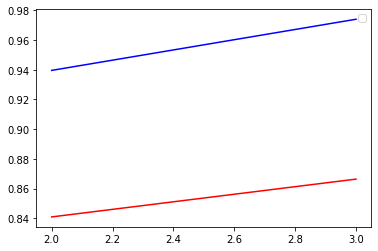

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import time
import matplotlib.pyplot as plt

n_estimators = [2,3]
train_score_list = []
test_score_list = []
for n in n_estimators:
  start_time = time.time()
  model = BaggingClassifier(random_state=318, n_estimators=n)
  print(f'fitting {n} estimators')
  model.fit(X,y)
  train_score = model.score(X, y)
  train_score_list.append(train_score)
  print(f'train score: {train_score}')
  test_score = model.score(X_test, y_test)
  test_score_list.append(test_score)
  print(f'test score: {test_score}')
  print(f'took {time.time()-start_time)/60:.2f}min')

plt.figure()
plt.plot(n_estimators, train_score_list, color='blue', label='train')
plt.plot(n_estimators, test_score_list, color='red', label='test')
plt.legend()
plt.show()

seems like n_estimator 3 is better than 2. Takes a while to run though.

fitting 4 estimators
Building estimator 1 of 4 for this parallel run (total 4)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 2 of 4 for this parallel run (total 4)...
Building estimator 3 of 4 for this parallel run (total 4)...
Building estimator 4 of 4 for this parallel run (total 4)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s finished


train score: 0.972693125


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s finished


test score: 0.8693125
took 3.61min
fitting 5 estimators
Building estimator 1 of 5 for this parallel run (total 5)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 2 of 5 for this parallel run (total 5)...
Building estimator 3 of 5 for this parallel run (total 5)...
Building estimator 4 of 5 for this parallel run (total 5)...
Building estimator 5 of 5 for this parallel run (total 5)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s finished


train score: 0.98474625


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


test score: 0.8773475
took 4.48min
fitting 6 estimators
Building estimator 1 of 6 for this parallel run (total 6)...
Building estimator 2 of 6 for this parallel run (total 6)...
Building estimator 3 of 6 for this parallel run (total 6)...
Building estimator 4 of 6 for this parallel run (total 6)...
Building estimator 5 of 6 for this parallel run (total 6)...
Building estimator 6 of 6 for this parallel run (total 6)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s finished


train score: 0.98349125


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s finished


test score: 0.87857
took 5.48min


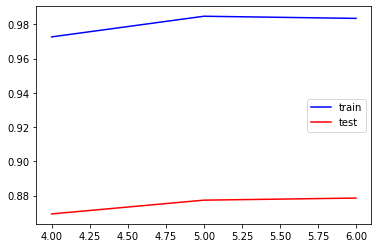

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier
import time
import matplotlib.pyplot as plt

n_estimators = [4,5,6]
train_score_list = []
test_score_list = []
for n in n_estimators:
  start_time = time.time()
  model = BaggingClassifier(random_state=318, n_estimators=n, verbose=3)
  print(f'fitting {n} estimators')
  model.fit(X,y)
  train_score = model.score(X, y)
  train_score_list.append(train_score)
  print(f'train score: {train_score}')
  test_score = model.score(X_test, y_test)
  test_score_list.append(test_score)
  print(f'test score: {test_score}')
  print(f'took {(time.time()-start_time)/60:.2f}min')

plt.figure()
plt.plot(n_estimators, train_score_list, color='blue', label='train')
plt.plot(n_estimators, test_score_list, color='red', label='test')
plt.legend()
plt.show()

## running starts 2020 June 17, 22:20 (google colab)

In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# define models and parameters
# define models and parameters
model = BaggingClassifier()
n_estimators = [5, 10, 20, 50, 100, 200]
random_state = [318]
grid = dict(n_estimators=n_estimators, random_state=random_state)

# define grid search
cv = 5 # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           cv=cv, scoring='accuracy',error_score=0, verbose=5)

# define grid search
cv=5 #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, 
                           scoring='accuracy',error_score=0, verbose=5)
grid_result = grid_search.fit(X, y)
# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 83.5min


Did not finish running

In [ ]:
## June 18, 2020 PFC

In [ ]:
# import local libraries using host specific paths
import socket, sys
hostname = socket.gethostname().split('.')[0]
# set local path settings based on computer host
if hostname == 'PFC':
    pylibrary = '/Users/connylin/Dropbox/Code/proj'
elif hostname == 'Angular-Gyrus':
    pylibrary = '/Users/connylin/Code/proj'
else:
    assert False, 'host computer not regonized'
# load local libraries
if pylibrary not in sys.path:
    sys.path.insert(1, pylibrary)
# import brainstation_capstone
# import other standard paths and local variables
from brainstation_capstone.system import host_paths
localpaths = host_paths.get(hostname)
datapath = localpaths['datapath']

# import standard libraries
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

getting host computer specific paths


In [ ]:
# example of grid searching key hyperparameters for BaggingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier

# get standard machine learning input data
from brainstation_capstone.etl.datatransform import Nutcracker
X, _, y, _ = Nutcracker(datapath).mldata(feature_reduction='None')

# define models and parameters
model = BaggingClassifier()
n_estimators = [5, 10, 20, 50, 100, 200]
random_state = [318]
grid = dict(n_estimators=n_estimators, random_state=random_state)

# define grid search
cv = 5 # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0, verbose=5)
grid_result = grid_search.fit(X, y)

# summarize results
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


None
None
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 71.0min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 1108.8min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 1108.8min finished
0.877010 (0.000512) with: {'n_estimators': 5, 'random_state': 318}
0.886002 (0.000492) with: {'n_estimators': 10, 'random_state': 318}
0.891929 (0.000502) with: {'n_estimators': 20, 'random_state': 318}
0.895543 (0.000446) with: {'n_estimators': 50, 'random_state': 318}
0.896837 (0.000355) with: {'n_estimators': 100, 'random_state': 318}
0.897474 (0.000270) with: {'n_estimators': 200, 'random_state': 318}
Best: 0.897474 using {'n_estimators': 200, 'random_state': 318}


look at the trend of estimators. the program crashed so need to manually enter results.


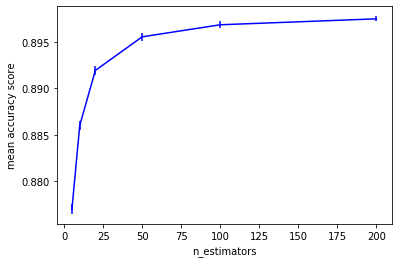

In [ ]:
means = [0.877010, 0.886002, 0.891929, 0.895543, 0.896837, 0.897474]
stds = [0.000512, 0.000492, 0.000502, 0.000446,0.000355, 0.000270]
n_estimators = [5, 10, 20, 50, 100, 200]

from brainstation_capstone.vs.plots import gridcvplot
gridcvplot(n_estimators, means, stds, 'n_estimators')

Seems n_estimators start to have diminishing return at 75 or more. The accuracy still continue to increase though. The time it takes to run this might not be worthwhile. Let's time how much time it takes to run a 150 and 250 n_estimators.

## test time required to run testing code
The code below is running on google colab | 20200619-1033

In [ ]:
# try one and see how long it takes
import timeit
from sklearn.ensemble import BaggingClassifier

# import data
from brainstation_capstone.etl.datatransform import Nutcracker
X, X_test, y, y_test = Nutcracker(datapath).mldata(feature_reduction='None')
# hyperparameters
n_estimators = 125
random_state = 318
# start timing
start_time = timeit.timeit()
# start model
model = BaggingClassifier(n_estimators=125, random_state=318)
model.fit(X, y)
# get scores
train_score = model.score(X, y)
test_score = model.score(X_test, y_test)
# print results
print(f"\tTrain Score: {train_score}")
print(f"\tTest Score: {test_score}")
# print time elapsed
finish_time = timeit.timeit()
print(f'\ttook {(finish_time - start_time)/60:.2f} min')
                        

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os

# get files from google drive
file_dir = '/content/gdrive/My Drive/ED Brain Station/data'
# load array
print('loading files')
X = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_train.csv'), delimiter=',')
y = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_train.csv'), delimiter=',')
X_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_X_test.csv'), delimiter=',')
y_test = np.loadtxt(os.path.join(file_dir, 'nutcracker_y_test.csv'), delimiter=',')

# print the array
print(X.shape)

loading files
(1600000, 21)


In [ ]:
# try one and see how long it takes
import time
from sklearn.ensemble import BaggingClassifier

# hyperparameters
n_estimators = 125
random_state = 318
# start timing
start_time = time.time()
# start model
model = BaggingClassifier(n_estimators=125, random_state=318, verbose=1)
model.fit(X, y)
# get scores
train_score = model.score(X, y)
test_score = model.score(X_test, y_test)
# print results
print(f"\tTrain Score: {train_score}")
print(f"\tTest Score: {test_score}")
# print time elapsed
finish_time = time.time()
print(f'\ttook {(finish_time - start_time)/60:.2f} min')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 93.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


	Train Score: 0.999985625
	Test Score: 0.89743
	took 96.75 min


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.3s finished


takes 97 min to run just one esimator of 125, decrease to 10 for tuning

## Tune n_estimator a bit more - google colab


In [ ]:
# code for google colab
from sklearn.ensemble import BaggingClassifier
# hyperparameters - testing
n_estimators = np.arange(150, 300, 50, dtype=int) # 100 or more are better. set to 10 for testing
hyperparameter_list = n_estimators
hyperparameter_name = 'n_estimators'
# hyperparameter - to be tuned
base_estimator = None
max_features = 1.0
oob_score = False
# hyperparamter - determined
max_samples = 1.0
boostrap = True
bootstrap_features = False
warm_start = False
n_jobs = None
random_state = 318
verbose=1
# start model -- for google colab
model_acc = test_model()
timer = ml_timer()
for parameter in hyperparameter_list:
    print(f'running {hyperparameter_name}: {parameter}')
    timer.param_start()
    model = BaggingClassifier(random_state=random_state, verbose=verbose,
                              n_estimators=parameter, 
                              max_samples=max_samples, max_features=max_features,
                              boostrap=boostrap, bootstrap_features=boostrap_features,
                              oob_score=oob_score, warm_start=warm_start, n_jobs=n_jobs
                              )
    model_acc.score_data(model, data)
    timer.param_end()
timer.session_end()
time_per_session = timer.get_time()
# graph
hyperparameterplot(hyperparameter_list, model_acc.train_acc, model_acc.test_acc, hyperparameter_name)
print(f'{hyperparameter_name} = {hyperparameter_list}')
print(f'train_acc = {model_acc.train_acc}\ntest_acc = {model_acc.test_acc}')
print(f'time per param = {time_per_session}')

timer starts
running activation: identity


TypeError: ignored